In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3] 

from grafica import *
from ClassNeuronaGral import NeuronaGradiente

In [3]:
# Leer FrutasTrain.csv
datos = pd.read_csv(DATOS_DIR + "FrutasTrain.csv")
nColum = list(datos.columns.values)

#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,0:2])
normalizarEntrada = 1

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    normalizador = preprocessing.StandardScaler()
    X = normalizador.fit_transform(X)
    
#--- SALIDA BINARIA ---
T = datos['Clase'] == 'Melon'  #es boolean
T = np.array(T * 1)  #lo convierte en binario
T = 2*T-1

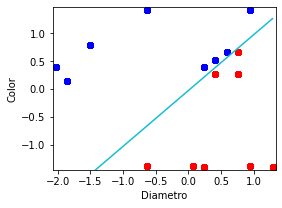

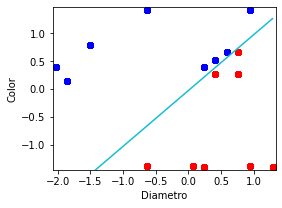

In [4]:
ppn = NeuronaGradiente(alpha=0.1, n_iter=50, cotaE=10e-07, FUN='tanh', random_state=None, draw=1, title=nColum[0:2])
ppn.fit(X, T)

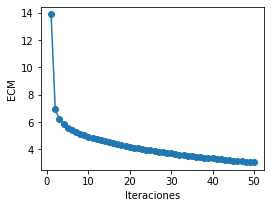

In [5]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [6]:
Y = ppn.predict(X)
print("Y = ", Y)
print("T = ", T)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))

Y =  [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
T =  [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
aciertos =  16
% de aciertos = 100.00 %


In [7]:
from sklearn import  metrics

# T contiene los valores esperados
# Y es la salida del modelo

aciertos = metrics.accuracy_score(T, Y)
print("%% accuracy = %.3f" % aciertos)

% accuracy = 1.000


In [9]:
report = metrics.classification_report(T,Y)
print("Resultado de la clasificación:\n%s" % report)

Resultado de la clasificación:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [10]:
MM = metrics.confusion_matrix(T, Y)
print("Matriz de confusión:\n%s" % MM)

Matriz de confusión:
[[8 0]
 [0 8]]
